## Data Exploration 
- downloaded spreadsheet data from: https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions/data?geometry=-122.526%2C47.676%2C-122.198%2C47.717

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
collisions=pd.read_csv("Collisions.csv")

In [4]:
collisions.head()

,X,Y,objectid,inckey,coldetkey,addrtype,collisiontype,exceptrsncode,exceptrsndesc,fatalities,...,speeding,st_colcode,st_coldesc,status,underinfl,vehcount,weather,seglanekey,crosswalkkey,hitparkedcar
0,-122.311966,47.663084,162247138,224200,224480,Intersection,Other,,NaN,0,...,NaN,23,From Same Direction - All Others,Matched,N,2,Clear or Partly Cloudy,0,0,N
1,-122.281547,47.537971,162247139,224000,224280,Block,NaN,NEI,"Not Enough Information, or Insufficient Locati...",0,...,NaN,,NaN,Unmatched,NaN,0,NaN,0,0,N
2,-122.343261,47.611452,162247140,223900,224180,Block,NaN,NEI,"Not Enough Information, or Insufficient Locati...",0,...,NaN,,NaN,Unmatched,NaN,0,NaN,0,0,N
3,-122.314650,47.571889,162247141,16555,16555,Block,Other,,NaN,0,...,NaN,23,From Same Direction - All Others,Matched,N,2,Raining,0,0,N
4,-122.345060,47.616144,162247142,16554,16554,Block,NaN,,NaN,0,...,NaN,,NaN,Unmatched,NaN,0,NaN,0,0,N


In [5]:
collisions.dtypes

X                  float64
Y                  float64
objectid             int64
inckey               int64
coldetkey            int64
addrtype            object
collisiontype       object
exceptrsncode       object
exceptrsndesc       object
fatalities           int64
inattentionind      object
incdate             object
incdttm             object
injuries             int64
intkey             float64
junctiontype        object
lightcond           object
location            object
pedcount             int64
pedcylcount          int64
pedrownotgrnt       object
personcount          int64
reportno            object
roadcond            object
sdot_colcode       float64
sdot_coldesc        object
sdotcolnum         float64
seriousinjuries      int64
severitycode        object
severitydesc        object
speeding            object
st_colcode          object
st_coldesc          object
status              object
underinfl           object
vehcount             int64
weather             object
s

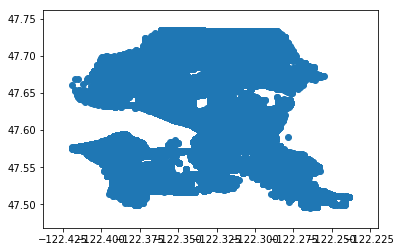

In [8]:
# all the lat / longs appear to be in the same general area - doesn't seem like there are any completely odd values 
%matplotlib inline
plt.scatter(collisions.X,collisions.Y)

In [14]:
# looking at what weather is coded 
collisions.weather.value_counts()/collisions.shape[0]

Clear or Partly Cloudy          0.512834
Raining                         0.156265
Overcast                        0.129459
Unknown                         0.074267
Snowing                         0.004095
Other                           0.003875
Fog/Smog/Smoke                  0.002539
Sleet/Hail/Freezing Rain        0.000546
Blowing Sand or Dirt or Snow    0.000194
Severe Crosswind                0.000097
Name: weather, dtype: float64

In [18]:
# there is about 10% of the time when the weather is not coded
# we could enhance that 
collisions.weather.isnull().mean()

0.1158294070856024

In [19]:
collisions.severitycode.value_counts()

1     122610
2      51580
0      18934
2b      2688
3        304
Name: severitycode, dtype: int64

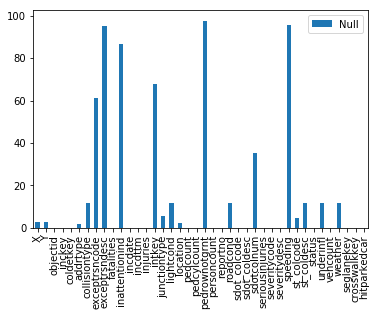

In [52]:
result_null=pd.DataFrame(np.zeros((len(collisions.columns),2)))
result_null.columns=["Column","Null"]
result_null.index=collisions.columns
for c in collisions.columns: 
    result_null.loc[c,"Column"]=str(c)
    result_null.loc[c,"Null"]=round(collisions.loc[:,c].isnull().mean()*100,2)
result_null.plot(kind="bar")